# horizontal_timeline.ipynb

https://coderzcolumn.com/tutorials/data-science/timeline-using-matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dates = ["2007-6-29", "2008-7-11", "2009-6-29", "2010-9-21", "2011-10-14", "2012-9-21", "2013-9-20",
         "2014-9-19", "2015-9-25", "2016-3-31", "2016-9-16", "2017-9-22", "2017-11-3", "2018-9-21",
         "2018-10-26", "2019-9-20", "2020-11-13", "2021-9-24", "2022-9-16"
        ]
phones = ["iPhone", "iPhone-3G", "iPhone-3GS", "iPhone 4", "iPhone 4S", "iPhone 5", "iPhone 5C/5S",
          "iPhone 6/6 Plus", "iPhone 6S/6s Plus", "iPhone SE", "iPhone 7/7 Plus", "iPhone 8/8 Plus",
          "iPhone X", "iPhone Xs/Max", "iPhone XR", "iPhone 11/Pro/Max", "iPhone 12 Pro", "iPhone 13 Pro",
          "iPhone 14 Plus/Pro Max"
         ]

iphone_df = pd.DataFrame(data={"Date": dates, "Product": phones})
iphone_df["Date"] = pd.to_datetime(iphone_df["Date"])
iphone_df["Level"] = [np.random.randint(-6,-2) if (i%2)==0 else np.random.randint(2,6) for i in range(len(iphone_df))]

iphone_df

,Date,Product,Level
0,2007-06-29,iPhone,-5
1,2008-07-11,iPhone-3G,2
2,2009-06-29,iPhone-3GS,-5
3,2010-09-21,iPhone 4,5
4,2011-10-14,iPhone 4S,-3
5,2012-09-21,iPhone 5,4
6,2013-09-20,iPhone 5C/5S,-6
7,2014-09-19,iPhone 6/6 Plus,3
8,2015-09-25,iPhone 6S/6s Plus,-5
9,2016-03-31,iPhone SE,3


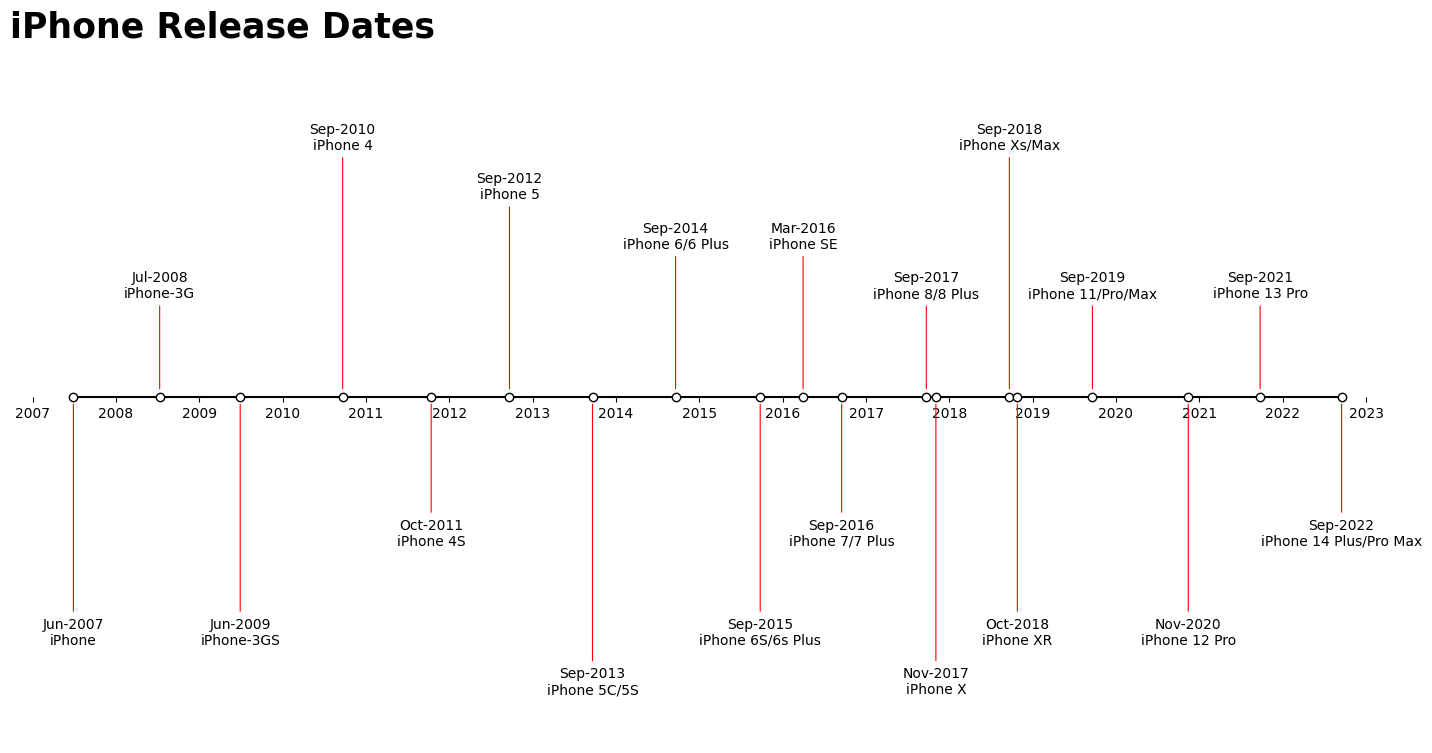

In [4]:

fig, ax = plt.subplots(figsize=(18,9))

ax.plot(iphone_df.Date, [0,]* len(iphone_df), "-o", color="black", markerfacecolor="white");

ax.set_xticks(pd.date_range("2007-1-1", "2023-1-1", freq="ys"), range(2007, 2024));
ax.set_ylim(-7,7);

for idx in range(len(iphone_df)):
    dt, product, level = iphone_df["Date"][idx], iphone_df["Product"][idx], iphone_df["Level"][idx]
    dt_str = dt.strftime("%b-%Y")
    ax.annotate(dt_str + "\n" + product, xy=(dt, 0.1 if level>0 else -0.1),xytext=(dt, level),
                arrowprops=dict(arrowstyle="-",color="red", linewidth=0.8),
                ha="center"
               );

ax.spines[["left", "top", "right", "bottom"]].set_visible(False);
ax.spines[["bottom"]].set_position(("axes", 0.5));
ax.yaxis.set_visible(False);
ax.set_title("iPhone Release Dates", pad=10, loc="left", fontsize=25, fontweight="bold");

In [5]:
df = pd.read_csv('../test-csv.csv')
df = df[['Country', 'State', 'Year', 'Date']]
df = df.sort_values(by='Date')
df = df[df.Year >= 2007]
df.index = np.arange(0, len(df))
df['Product'] = df.apply(lambda x: f'{x.Country}: {x.State}', axis=1)
df['Level'] = df.apply(lambda x: np.random.randint(low=-6, high=7), axis=1)
df = df[['Date', 'Product', 'Level']]
df['Date'] = pd.to_datetime(df['Date'])
df.to_csv('timeline_2007.csv')
df

,Date,Product,Level
0,2007-01-01,Guam: Guam,4
1,2013-01-01,Hawaii: Oahu,4
2,2015-01-01,Papua New Guinea: Port Moresby,-2
3,2015-01-01,Solomon Islands: Guadalcanal,2
4,2017-01-01,Solomon Islands: Savo Island,0
5,2017-01-01,CNMI: Rota,2
6,2017-01-01,Solomon Islands: Malaita Island,2
7,2019-01-01,Vanuatu: Efate,1
8,2019-01-01,New Caledonia: nan,3
9,2023-05-01,Hawaii: Kauai,-5


AttributeError: 'AxesSubplot' object has no attribute 'update_annotations'

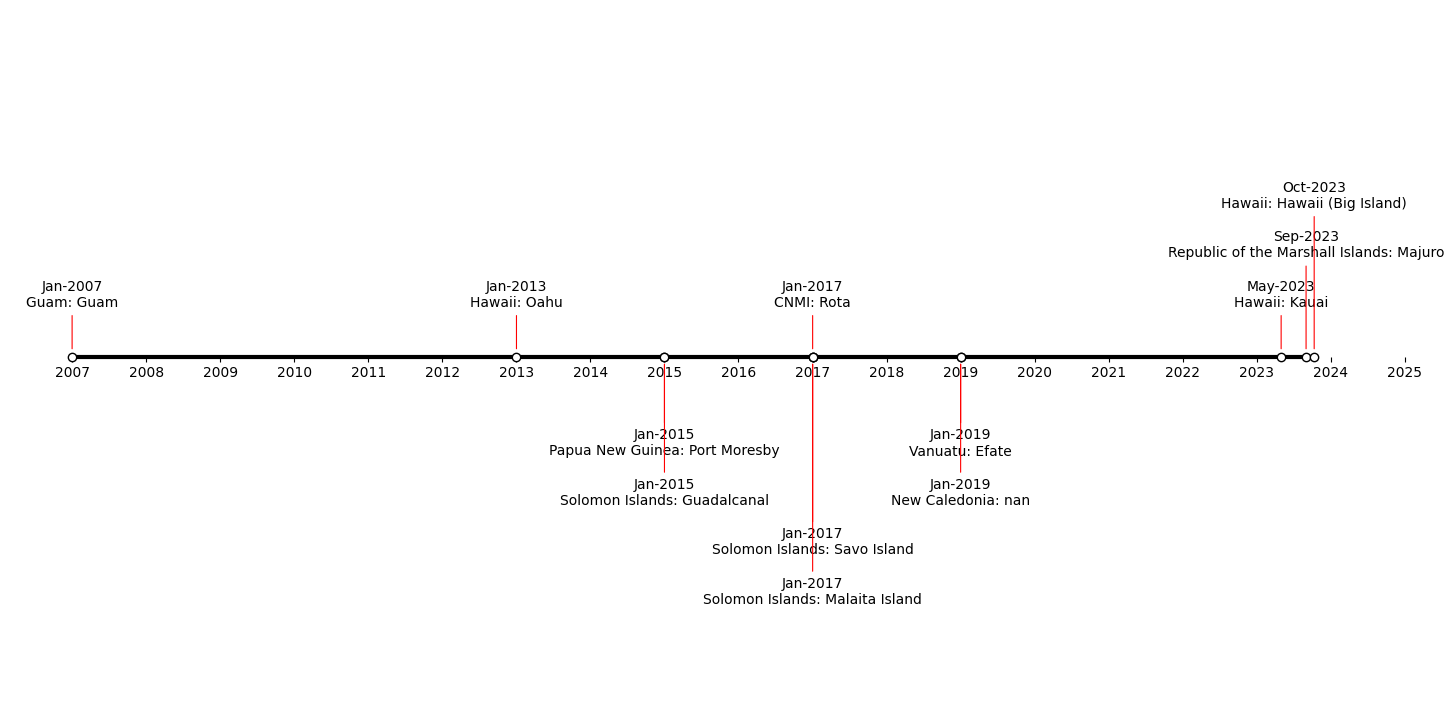

In [18]:
df = pd.read_csv('timeline_2007.csv', parse_dates=['Date'])

fig, ax = plt.subplots(figsize=(18,9))

ax.plot(df.Date, [0,]* len(df), "-o", color="black", markerfacecolor="white",linewidth=3);

ax.set_xticks(pd.date_range("2007-1-1", "2025-1-1", freq="ys"), range(2007, 2026));
ax.set_ylim(-7,7);

for idx in range(len(df)):
    dt, product, level = df["Date"][idx], df["Product"][idx], df["Level"][idx]
    dt_str = dt.strftime("%b-%Y")

    ax.spines[["left", "top", "right", "bottom"]].set_visible(False);
    ax.spines[["bottom"]].set_position(("axes", 0.5));
    ax.yaxis.set_visible(False);

    ax.annotate(dt_str + "\n" + product, xy=(dt, 0.1 if level>0 else -0.1),xytext=(dt, level),
                arrowprops=dict(arrowstyle="-",color="red", linewidth=0.8),
                ha="center"
               );


# ax.set_title("Earliest Reports of <i>Oryctes rhinoceros</i> on Islands in the Pacific and Indian Oceans", pad=10, loc="left", fontsize=18, fontweight="bold");

In [19]:
df = px.data.gapminder().query("country=='Canada'")
fig = px.line(df, x="year", y="lifeExp", title='Life expectancy in Canada')
fig.show()


NameError: name 'px' is not defined